**ARCHIE MANALO**

**BSCS 4B**

**CSST 106**

**MACHINE PROBLEM 3**

**Install OpenCV**

In [23]:
!pip uninstall opencv-python opencv-contrib-python
!pip install opencv-contrib-python

Found existing installation: opencv-python 4.10.0.84
Uninstalling opencv-python-4.10.0.84:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/cv2/*
    /usr/local/lib/python3.10/dist-packages/opencv_python-4.10.0.84.dist-info/*
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Core-e6d3f451.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Gui-5dea4132.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Test-d435aae7.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5Widgets-e392eaf8.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libQt5XcbQpa-3bf8a55a.so.5.15.13
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libX11-xcb-0e257303.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_python.libs/libavcodec-9aae324f.so.59.37.100
    /usr/loca

**Step 1: Load Images**

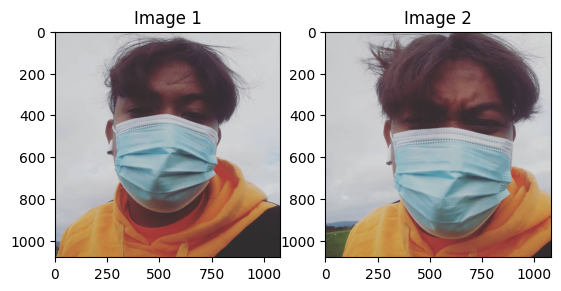

In [24]:
import cv2
import matplotlib.pyplot as plt

# Load two images
image1 = cv2.imread('kuto.jpg')
image2 = cv2.imread('kuto(1).jpg')

# Convert images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Display images
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Image 1')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Image 2')

plt.show()

**1. SIFT Feature Extraction**

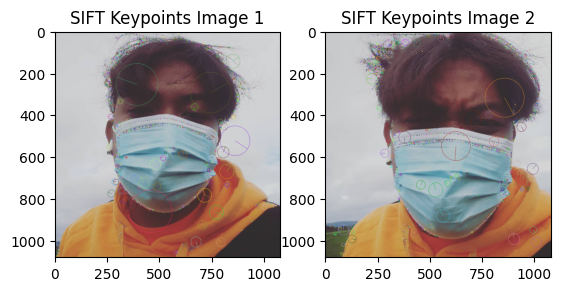

In [25]:
# SIFT Feature Extraction
sift = cv2.SIFT_create()
keypoints_sift_1, descriptors_sift_1 = sift.detectAndCompute(gray1, None)
keypoints_sift_2, descriptors_sift_2 = sift.detectAndCompute(gray2, None)

# Draw keypoints for SIFT
image_sift_1 = cv2.drawKeypoints(image1, keypoints_sift_1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
image_sift_2 = cv2.drawKeypoints(image2, keypoints_sift_2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display SIFT keypoints
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_sift_1, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints Image 1')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_sift_2, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints Image 2')

plt.show()

**2. SURF Feature Extraction**

SURF not available. Trying SIFT instead.


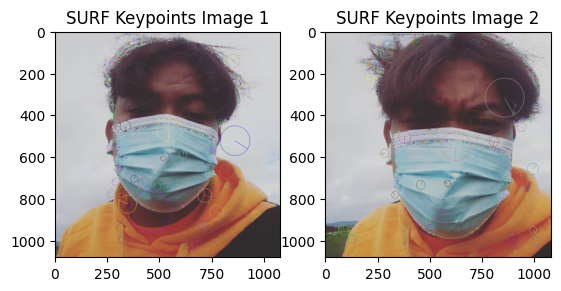

In [32]:
import cv2
import matplotlib.pyplot as plt

# Convert images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Create SURF object. If SURF is not available, try using SIFT instead.
try:
    surf = cv2.xfeatures2d.SURF_create(400)
except AttributeError:
    print("SURF not available. Trying SIFT instead.")
    surf = cv2.SIFT_create()  # Fallback to SIFT

keypoints_surf_1, descriptors_surf_1 = surf.detectAndCompute(gray1, None)
keypoints_surf_2, descriptors_surf_2 = surf.detectAndCompute(gray2, None)

# Draw keypoints for SURF/SIFT
image_surf_1 = cv2.drawKeypoints(image1, keypoints_surf_1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
image_surf_2 = cv2.drawKeypoints(image2, keypoints_surf_2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display SURF/SIFT keypoints
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_surf_1, cv2.COLOR_BGR2RGB))
plt.title('SURF Keypoints Image 1')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_surf_2, cv2.COLOR_BGR2RGB))
plt.title('SURF Keypoints Image 2')

plt.show()

**3. ORB Feature Extraction**

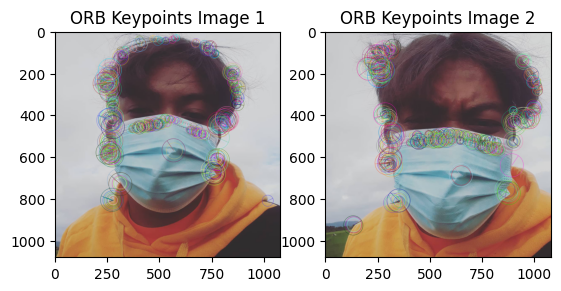

In [34]:
# ORB Feature Extraction
orb = cv2.ORB_create()
keypoints_orb_1, descriptors_orb_1 = orb.detectAndCompute(gray1, None)
keypoints_orb_2, descriptors_orb_2 = orb.detectAndCompute(gray2, None)

# Draw keypoints for ORB
image_orb_1 = cv2.drawKeypoints(image1, keypoints_orb_1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
image_orb_2 = cv2.drawKeypoints(image2, keypoints_orb_2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display ORB keypoints
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_orb_1, cv2.COLOR_BGR2RGB))
plt.title('ORB Keypoints Image 1')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_orb_2, cv2.COLOR_BGR2RGB))
plt.title('ORB Keypoints Image 2')

plt.show()

**STEP 3: Feature Matching with Brute-Force and FLANN**

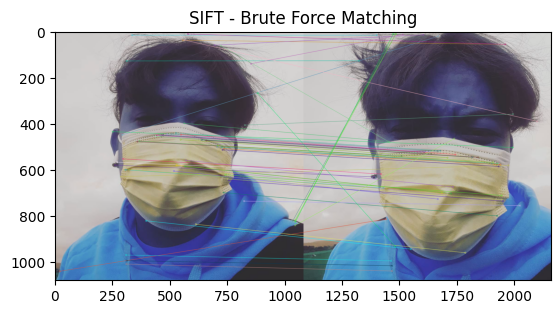

In [35]:
# Brute-Force Matcher for SIFT
bf = cv2.BFMatcher()
matches_sift = bf.knnMatch(descriptors_sift_1, descriptors_sift_2, k=2)

# Apply ratio test as per Lowe's paper
good_matches_sift = []
for m, n in matches_sift:
    if m.distance < 0.75 * n.distance:
        good_matches_sift.append(m)

# Draw matches
sift_bf_match = cv2.drawMatches(image1, keypoints_sift_1, image2, keypoints_sift_2, good_matches_sift, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
plt.imshow(sift_bf_match)
plt.title('SIFT - Brute Force Matching')
plt.show()

**2. FLANN Matcher**

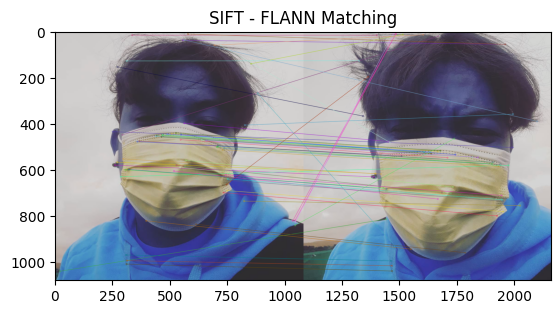

In [29]:
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches_sift_flann = flann.knnMatch(descriptors_sift_1, descriptors_sift_2, k=2)

# Apply Lowe's ratio test
good_matches_flann = []
for m, n in matches_sift_flann:
    if m.distance < 0.75 * n.distance:
        good_matches_flann.append(m)

# Draw matches
sift_flann_match = cv2.drawMatches(image1, keypoints_sift_1, image2, keypoints_sift_2, good_matches_flann, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
plt.imshow(sift_flann_match)
plt.title('SIFT - FLANN Matching')
plt.show()

**Step 4: Image Alignment Using Homography**

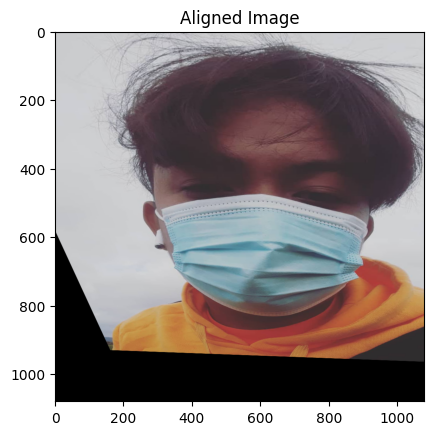

True

In [37]:
# Import numpy with the alias np
import numpy as np

# Extract keypoint locations from the good matches
src_pts = np.float32([keypoints_sift_1[m.queryIdx].pt for m in good_matches_sift]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints_sift_2[m.trainIdx].pt for m in good_matches_sift]).reshape(-1, 1, 2)

# Compute homography matrix
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Warp image1 to align with image2
height, width, channels = image2.shape
aligned_image = cv2.warpPerspective(image1, H, (width, height))

# Display aligned image
plt.imshow(cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB))
plt.title('Aligned Image')
plt.show()

# Save aligned image
cv2.imwrite('aligned_image.jpg', aligned_image)


**Step 5: Performance Analysis**

In [38]:
e1 = cv2.getTickCount()
# [run SIFT or SURF or ORB process here]
e2 = cv2.getTickCount()
time = (e2 - e1) / cv2.getTickFrequency()
print(f"Time taken: {time} seconds")


Time taken: 5.7834e-05 seconds
